In [1]:
pip install qutip

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 2.1 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.6 MB 1.7 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/9.6 MB 1.7 MB/s eta 0:00:05
   ------ --------------------------------- 1.6/9.6 MB 1.7 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/9.6 MB 1.7 MB/s eta 0:00:05
   --------- ------------------------------ 2.4/9.6 MB 1.8 MB/s eta 0:00:05
   ------------- -------------------------- 3.1/9.6 MB 2.0 MB/s eta 0:00:04
   --------------- ------------------------ 3.7/9.6 MB 2.1 MB/s eta 0:00:03
   ------------------ --------------------- 4.5/9.6 MB 2.2 MB/s eta 0:00:03
   -------------------- ------------------- 5.0/9.6 MB 2.3 MB/s eta 0:00:03
   ----------------------- ---------------- 5.8/9.6 MB 2.4 MB/s eta 0:00:02
   -----------------------

In [2]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


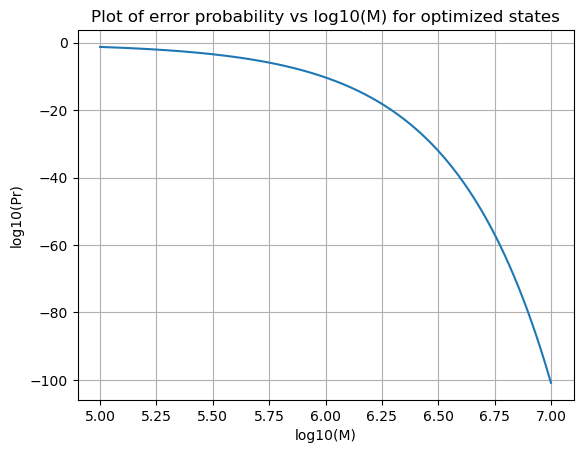

In [13]:
log10_M_values = np.linspace(5 , 7 , 500)

# Compute M values from the log10 values
M_values = 10 ** log10_M_values

# Compute constants for the formula
log10_0_5 = np.log10(0.5)
log10_0_992 = np.log10( 0.9999768439485448)

# Calculate the result
result = log10_0_5 + M_values * log10_0_992

# Plot the result
plt.plot(log10_M_values, result)
plt.xlabel('log10(M)')
plt.ylabel('log10(Pr)')
plt.title('Plot of error probability vs log10(M) for optimized states')
plt.grid(True)
plt.show()

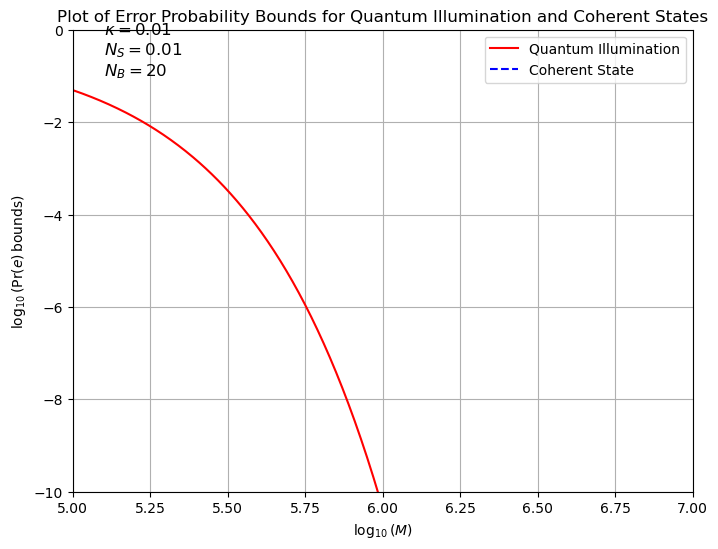

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Generate log10(M) values
log10_M_values = np.linspace(5, 7, 500)

# Compute constants for the formula
log10_0_5 = np.log10(0.5)
log10_0_992 = np.log10(0.9999768499753526)

# Quantum illumination curve (solid line)
M_values = 10 ** log10_M_values
quantum_result = log10_0_5 + M_values * log10_0_992

# Coherent state curve (dashed line with slightly different parameters for demonstration)
coherent_log10_0_99 = np.log10(0.999)
coherent_result = log10_0_5 + M_values * coherent_log10_0_99

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(log10_M_values, quantum_result, 'r-', label='Quantum Illumination')
plt.plot(log10_M_values, coherent_result, 'b--', label='Coherent State')
plt.xlim(5, 7)
plt.ylim(-10, 0)

# Labels and title
plt.xlabel(r'$\log_{10}(M)$')
plt.ylabel(r'$\log_{10}(\text{Pr}(e) \, \text{bounds})$')
plt.title('Plot of Error Probability Bounds for Quantum Illumination and Coherent States')
plt.text(5.1, -1, r'$\kappa = 0.01$' + '\n' + r'$N_S = 0.01$' + '\n' + r'$N_B = 20$', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()


In [5]:
import numpy as np
M_values=np.linspace(5,7,100)
# Compute M values from the log10 values
M_values = 10 ** log10_M_values

# Compute constants for the formula
log10_0_5 = np.log10(0.5)
log10_0_992 = np.log10(0.9999768499753526)

# Calculate the result
result = log10_0_5 + M_values * log10_0_992

# Plot the result
plt.plot(log10_M_values, result)
plt.xlabel('log10(M)')
plt.ylabel('log10(Pr)')
plt.title('Plot of error probability vs log10(M) for optimized states')
plt.grid(True)
plt.show()

NameError: name 'log10_M_values' is not defined

In [9]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt 
from qutip import tensor, fock, Qobj,ket2dm,ptrace,thermal_dm,destroy


ModuleNotFoundError: No module named 'qutip'

In [15]:
def normalize_values(alpha, beta, gamma, delta):
    total = abs(alpha) + abs(beta) + abs(gamma) + abs(delta)
    if total == 0:
        raise ValueError("The sum of the values is zero; cannot normalize.")
    alpha_norm = alpha / total
    beta_norm = beta / total
    gamma_norm = gamma / total
    delta_norm = delta / total
    return alpha_norm, beta_norm, gamma_norm, delta_norm

def state(alpha, beta, gamma, delta, dim):
    state = (
        alpha * tensor(fock(dim, 0), fock(dim, 0)) +
        beta * tensor(fock(dim, 0), fock(dim, 1)) +
        gamma * tensor(fock(dim, 1), fock(dim, 0)) +
        delta * tensor(fock(dim, 1), fock(dim, 1))
    )
    return state.unit()  # Ensure state is normalized

def idler_density(psi_s_i):
    rho = ket2dm(psi_s_i)
    idler_rho = ptrace(rho, 1)  # Trace out the first subsystem
    return idler_rho

def fractional_power(rho, s):
    eigvals, eigvecs = rho.eigenstates()
    eigvals = np.clip(eigvals, 1e-10, None)  # Avoid very small values
    eigvals = np.array([val ** s for val in eigvals])
    return sum(eig * eigvec * eigvec.dag() for eig, eigvec in zip(eigvals, eigvecs))

def trace_rho_s_rho_1_minus_s(s):
    rho_zero_s = fractional_power(rho_zero, s)
    rho_one_1_minus_s = fractional_power(rho_one, 1 - s)
    return (rho_zero_s * rho_one_1_minus_s).tr().real

def beam_splitter(eta, N):
    a = destroy(N)
    b = destroy(N)

    theta = np.arcsin(np.sqrt(eta))
    U = (-1j * theta * (tensor(a.dag(), b) - tensor(a, b.dag()))).expm()
    return U





In [19]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

# Define your custom functions
def normalize_values(alpha, beta, gamma, delta):
    total = abs(alpha) + abs(beta) + abs(gamma) + abs(delta)
    if total == 0:
        raise ValueError("The sum of the values is zero; cannot normalize.")
    alpha_norm = alpha / total
    beta_norm = beta / total
    gamma_norm = gamma / total
    delta_norm = delta / total
    return alpha_norm, beta_norm, gamma_norm, delta_norm

def state(alpha, beta, gamma, delta, dim):
    # Define the two-mode state psi
    state = (
        alpha * tensor(fock(dim, 0), fock(dim, 0)) +
        beta * tensor(fock(dim, 0), fock(dim, 1)) +
        gamma * tensor(fock(dim, 1), fock(dim, 0)) +
        delta * tensor(fock(dim, 1), fock(dim, 1))
    )
    return state.unit()  # Ensure state is normalized

def idler_density(psi_s_i):
    rho = ket2dm(psi_s_i)
    idler_rho = rho.ptrace(1)  # Trace out the signal mode (mode 1)
    return idler_rho

def fractional_power(rho, s):
    eigvals, eigvecs = rho.eigenstates()
    eigvals = np.clip(eigvals.real, 1e-10, None)  # Ensure non-negative eigenvalues
    eigvals_s = eigvals ** s
    rho_s = sum(eig * eigvec * eigvec.dag() for eig, eigvec in zip(eigvals_s, eigvecs))
    return rho_s

def beam_splitter(eta, N, total_modes, mode1, mode2):
    # Create annihilation operators for all modes
    a_ops = [destroy(N) for _ in range(total_modes)]
    
    # Beam splitter interaction between mode1 and mode2
    theta = np.arcsin(np.sqrt(eta))
    H_bs = -1j * theta * (tensor_oper(a_ops, mode1, 'dag') * tensor_oper(a_ops, mode2) -
                          tensor_oper(a_ops, mode1) * tensor_oper(a_ops, mode2, 'dag'))
    
    U_bs = H_bs.expm()
    return U_bs

def tensor_oper(a_ops, target_mode, dagger=''):
    # Helper function to place an operator in the correct position
    op_list = [qeye(a_ops[0].dims[0][0]) for _ in range(len(a_ops))]
    if dagger == 'dag':
        op_list[target_mode] = a_ops[target_mode].dag()
    else:
        op_list[target_mode] = a_ops[target_mode]
    return tensor(op_list)

def trace_rho_s_rho_1_minus_s(s):
    rho_zero_s = fractional_power(rho_zero, s)
    rho_one_1_minus_s = fractional_power(rho_one, 1 - s)
    return (rho_zero_s * rho_one_1_minus_s).tr().real

# Parameters
alpha = complex(-0.002606109556237047, 0)
beta = complex(0.4468834327485815, 0)
gamma = complex(0.5473199531294434, 0)
delta = complex(0.003190504565737972, 0)
b = 0.5      # Mean thermal photons (less than 1)
eta = 0.01
dim = 8

# Normalize and create state
alpha, beta, gamma, delta = normalize_values(alpha, beta, gamma, delta)
psi = state(alpha, beta, gamma, delta, dim)

# Calculate idler density matrix
idler_dm = idler_density(psi)

# Total number of modes
total_modes = 3

# Modes where the beam splitter acts
mode1 = 0  # Thermal mode
mode2 = 1  # First mode of psi (signal mode)

# Create the beam splitter operator acting on modes 0 and 1
U_BS = beam_splitter(eta, dim, total_modes, mode1, mode2)

# Thermal state for mode 0
thermal_state = thermal_dm(dim, b)

# Create the initial three-mode state
rho_in = tensor(thermal_state, ket2dm(psi))

# Dimensions check
print("Dimensions of U_BS:", U_BS.dims)
print("Dimensions of rho_in:", rho_in.dims)

# Apply the beam splitter operator
rho_one = U_BS * rho_in * U_BS.dag()

# Define rho_zero (no interaction)
rho_zero = tensor(thermal_state, idler_dm)

# Calculating trace and plot
s_values = np.linspace(0, 1, 100)
trace_values = [trace_rho_s_rho_1_minus_s(s) for s in s_values]

plt.plot(s_values, trace_values)
plt.xlabel('s')
plt.ylabel('Trace(rho_zero^s * rho_one^(1-s))')
plt.title('Trace of rho_zero^s * rho_one^(1-s) vs s')
plt.grid(True)
plt.show()

# Finding minimum trace value
min_trace_value = min(trace_values)
min_trace_index = trace_values.index(min_trace_value)
min_s_value = s_values[min_trace_index]

print(f"Minimum trace value: {min_trace_value} at s = {min_s_value}")

factor = abs(beta)**2 + abs(gamma)**2 + abs(delta)**2

# Generate log10(M) values ranging from log10(10^5 * factor) to log10(10^7 * factor)
log10_M_values = np.linspace(np.log10(1e5 * factor), np.log10(1e7 * factor), 500)

# Compute M values from the log10 values
M_values = 10 ** log10_M_values

# Compute constants for the formula
log10_0_5 = np.log10(0.5)
log10_min_trace_value = np.log10(min_trace_value)

# Calculate the result
result = log10_0_5 + M_values * log10_min_trace_value

# Plot the result
plt.plot(log10_M_values, result)
plt.xlabel('log10(M)')
plt.ylabel('log10(Pr)')
plt.title('Plot of error probability vs log10(M) for optimized states')
plt.grid(True)
plt.show()


Dimensions of U_BS: [[8, 8, 8], [8, 8, 8]]
Dimensions of rho_in: [[8, 8, 8], [8, 8, 8]]


TypeError: incompatible dimensions [[8, 8], [8, 8]] and [[8, 8, 8], [8, 8, 8]]

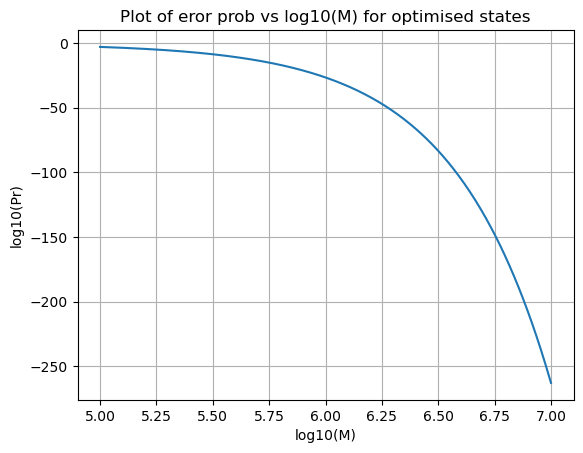

In [24]:
log10_M_values = np.linspace(5, 7, 500)
M_values = 10 ** log10_M_values
log10_0_5 = np.log10(0.5)
log10_0_992 = np.log10( 0.9999395180653984 )
result = log10_0_5 + M_values * log10_0_992

plt.plot(log10_M_values, result)
plt.xlabel('log10(M)')
plt.ylabel('log10(Pr)')
plt.title('Plot of eror prob vs log10(M) for optimised states')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count
from qutip import fock, tensor, ket2dm, thermal_dm, ptrace

def normalize_values(alpha, beta, gamma, delta):
    total = abs(alpha) + abs(beta) + abs(gamma) + abs(delta)
    if total == 0:
        raise ValueError("The sum of the values is zero; cannot normalize.")
    alpha_norm = alpha / total
    beta_norm = beta / total
    gamma_norm = gamma / total
    delta_norm = delta / total
    return alpha_norm, beta_norm, gamma_norm, delta_norm

def state(alpha, beta, gamma, delta, dim):
    state = (
        alpha * tensor(fock(dim, 0), fock(dim, 0)) +
        beta * tensor(fock(dim, 0), fock(dim, 1)) +
        gamma * tensor(fock(dim, 1), fock(dim, 0)) +
        delta * tensor(fock(dim, 1), fock(dim, 1))
    )
    return state.unit()  # Ensure state is normalized

def idler_density(psi_s_i):
    rho = ket2dm(psi_s_i)
    idler_rho = ptrace(rho, 1)  # Trace out the first subsystem
    return idler_rho

def fractional_power(rho, s):
    eigvals, eigvecs = rho.eigenstates()
    eigvals = np.clip(eigvals, 1e-10, None)  # Avoid very small values
    eigvals = np.array([val ** s for val in eigvals])
    return sum(eig * eigvec * eigvec.dag() for eig, eigvec in zip(eigvals, eigvecs))

def trace_rho_s_rho_1_minus_s(s, rho_zero, rho_one):
    rho_zero_s = fractional_power(rho_zero, s)
    rho_one_1_minus_s = fractional_power(rho_one, 1 - s)
    return (rho_zero_s * rho_one_1_minus_s).tr().real

def calculate_trace_values(s_values, rho_zero, rho_one, num_cores=14):
    # Use multiprocessing pool to distribute the task
    with Pool(processes=num_cores) as pool:
        results = pool.starmap(trace_rho_s_rho_1_minus_s, [(s, rho_zero, rho_one) for s in s_values])
    return results

alpha = complex(0.99504, 0)
beta = complex(0, 0)
gamma = complex(0, 0)
delta = complex(0.09901, 0)
b = 20     # Mean thermal photons
eta = 0.01
dim = 16

# Normalize and create state
alpha, beta, gamma, delta = normalize_values(alpha, beta, gamma, delta)
psi = state(alpha, beta, gamma, delta, dim)

# Calculate idler density matrix
idler_dm = idler_density(psi)

# Define rho_zero and rho_one
rho_zero = tensor(thermal_dm(dim, b), idler_dm)
rho_one = eta * ket2dm(psi) + (1 - eta) * rho_zero

# Calculating trace and plot using parallel processing
s_values = np.linspace(0, 1, 100)
trace_values = calculate_trace_values(s_values, rho_zero, rho_one, num_cores=128)

plt.plot(s_values, trace_values)
plt.xlabel('s')
plt.ylabel('Trace(rho_zero^s * rho_one^(1-s))')
plt.title('Trace of rho_zero^s * rho_one^(1-s) vs s')
plt.grid(True)
plt.show()

# Finding minimum trace value
min_trace_value = min(trace_values)
min_trace_index = trace_values.index(min_trace_value)
min_s_value = s_values[min_trace_index]

print(f"Minimum trace value: {min_trace_value} at s = {min_s_value}")
factor = beta**2 + gamma**2 + delta**2

# Generate log10(M) values ranging from log10(10^5 * factor) to log10(10^7 * factor)
log10_M_values = np.linspace(5 * factor, 7 * factor, 500)

# Compute M values from the log10 values
M_values = 10 ** log10_M_values

# Compute constants for the formula
log10_0_5 = np.log10(0.5)
log10_0_992 = np.log10(min_trace_value)

# Calculate the result
result = log10_0_5 + M_values * log10_0_992

# Plot the result
plt.plot(log10_M_values, result)
plt.xlabel('log10(M)')
plt.ylabel('log10(Pr)')
plt.title('Plot of error probability vs log10(M) for optimized states')
plt.grid(True)
plt.show()
